In [4]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [30]:
from thinkdsp import read_wave

#wave = read_wave('193335__soundman9826__rain-and-thunder.wav')
#wave.make_audio()

In [9]:
segment = wave.segment(start=5, duration=1.0)
segment.make_audio()

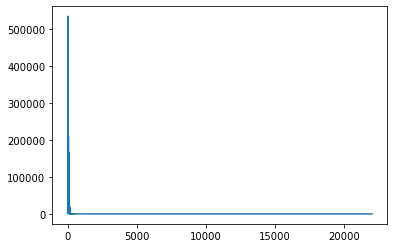

In [10]:
spectrum = segment.make_spectrum()
spectrum.plot_power()

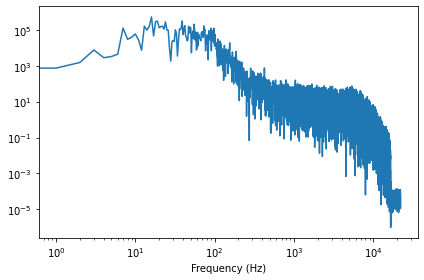

In [12]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

In [13]:
segment = wave.segment(start=62, duration=1.0)
segment.make_audio()

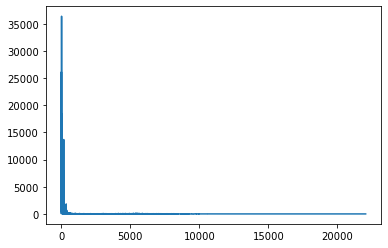

In [14]:
spectrum = segment.make_spectrum()
spectrum.plot_power()

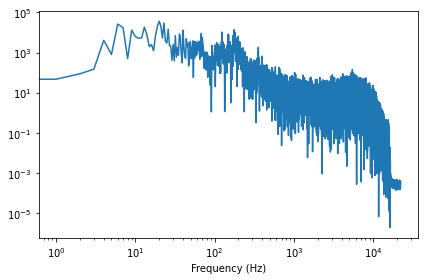

In [15]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

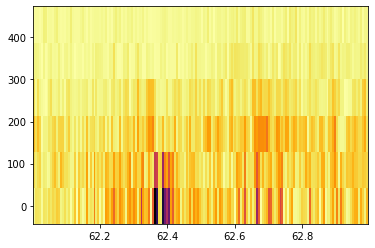

In [17]:
segment.make_spectrogram(512).plot(high=500)

In [31]:
#wave = read_wave('13793__soarer__north-sea.wav')
#wave.make_audio()


In [33]:
segment = wave.segment(start=2, duration=1.0)
segment.make_audio()

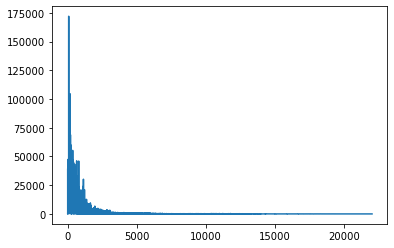

In [36]:
spectrum = segment.make_spectrum()
spectrum.plot_power()

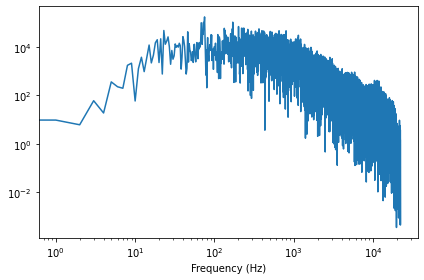

In [37]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

In [32]:
segment2 = wave.segment(start=62, duration=1.0)
segment2.make_audio()

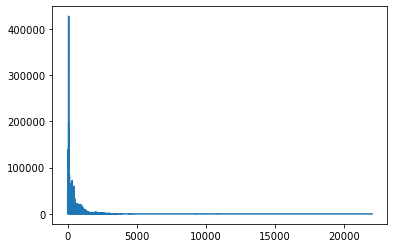

In [38]:
spectrum = segment2.make_spectrum()
spectrum.plot_power()

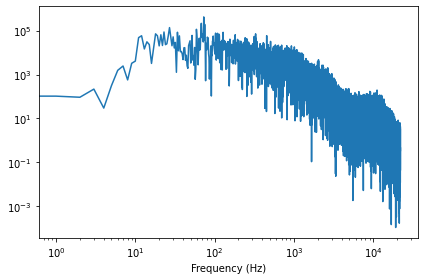

In [39]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

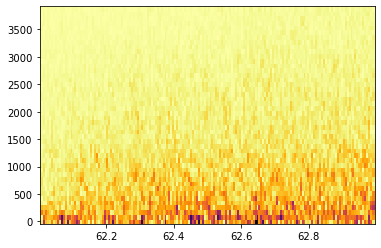

In [40]:
segment2.make_spectrogram(512).plot(high=4000)

In [43]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    spectro = wave.make_spectrogram(seg_length , win_flag)
    spectrums = spectro.spec_map.values()
    
    psds = [spectrum.power for spectrum in spectrums]
    
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

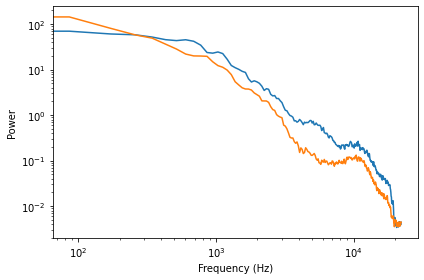

In [44]:
from thinkdsp import Spectrum

psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)
psd.plot_power()
psd2.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [8]:
import pandas as pd

dataB = pd.read_csv('BTC_USD_2020-04-28_2021-04-27-CoinDesk.csv')
dataB

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-04-28,7776.507543,7624.854338,7798.276656,7621.487082
1,BTC,2020-04-29,7761.758784,7788.574229,7793.636018,7677.178774
2,BTC,2020-04-30,8773.106488,7761.758619,8973.079277,7725.542654
3,BTC,2020-05-01,8767.672623,8768.047180,9469.078423,8415.474740
4,BTC,2020-05-02,8853.774484,8767.672143,9073.817530,8593.380363
...,...,...,...,...,...,...
360,BTC,2021-04-23,51965.059559,53830.823864,55471.076372,50500.731862
361,BTC,2021-04-24,50669.144382,51714.073970,52111.185068,47467.912032
362,BTC,2021-04-25,50733.769504,51217.172330,51253.442948,48932.158814
363,BTC,2021-04-26,48542.952203,50177.237403,50668.659025,47105.593068


In [19]:
data = dataB['Closing Price (USD)']
di= dataB.index

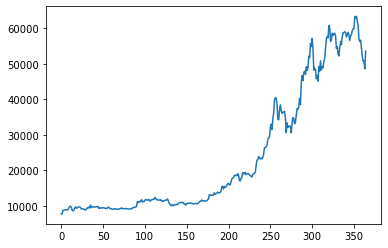

In [20]:
from thinkdsp import Wave
wave = Wave(data , di , framerate=1)
wave.plot()

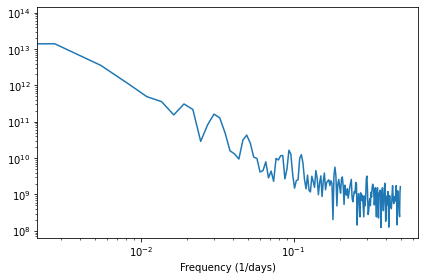

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', **loglog)


In [55]:
spectrum.estimate_slope()[0]

-1.7260415653227166

In [23]:
from thinkdsp import Noise
class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [24]:
signal = UncorrelatedPoissonNoise(amp=0.001)
wave = signal.make_wave(duration=3, framerate=10000)
wave.make_audio()

In [25]:
expected = 0.001 * 10000 * 3
actual = sum(wave.ys)
print(expected, actual)

30.0 28


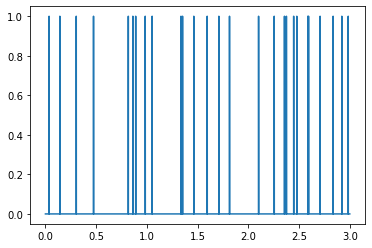

In [26]:
wave.plot()

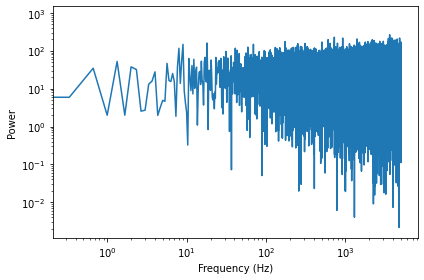

In [27]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',ylabel='Power',**loglog)


In [28]:
spectrum.estimate_slope()[0]

-2.817769741363608e-05

In [1]:
def voss(nrows , ncols=16):
    array = np.empty((nrows , ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows , size=n)
    array[rows, cols] = np.random.random(n)
    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)
    return total.values

In [11]:
wave = Wave(voss(11100))
wave.unbias()
wave.normalize()
wave.make_audio()

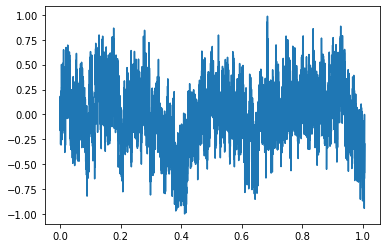

In [12]:
wave.plot()

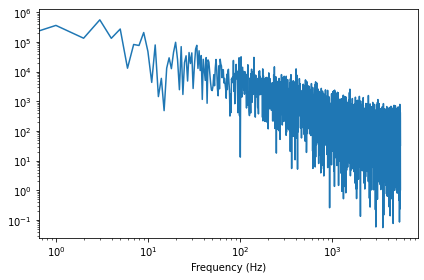

In [15]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)


In [16]:
spectrum.estimate_slope().slope

-0.9694775878926188